In [36]:
from qiskit import QuantumCircuit
qc_charlie = QuantumCircuit(2,2)
qc_charlie.ry(1.911,1)
qc_charlie.cx(1,0)
qc_charlie.ry(0.785,0)
qc_charlie.cx(1,0)
qc_charlie.ry(2.356,0)

qc_charlie.draw()

┌───┐┌───────────┐┌───┐┌───────────┐
q_0: ─────────────┤ X ├┤ Ry(0.785) ├┤ X ├┤ Ry(2.356) ├
     ┌───────────┐└─┬─┘└───────────┘└─┬─┘└───────────┘
q_1: ┤ Ry(1.911) ├──■─────────────────■───────────────
     └───────────┘                                    
c: 2/═════════════════════════════════════════════════

In [37]:
meas_xx = QuantumCircuit(2,2)
meas_xx.h([0, 1])
from qiskit.quantum_info import Statevector
ket = Statevector(qc_charlie.compose(meas_xx))
ket.draw(output="latex")

<IPython.core.display.Latex object>

Results for z measurements:


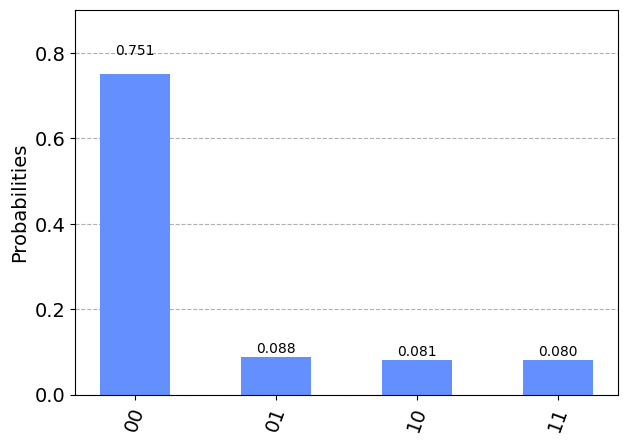

In [38]:
from qiskit.visualization import plot_histogram
from qiskit import Aer

meas_xx.measure([0,1],[0,1])
# meas_xx.reset(0)
# meas_xx.reset(1)

print('Results for z measurements:')
backend = Aer.get_backend("aer_simulator")
counts = backend.run(qc_charlie.compose(meas_xx)).result().get_counts()
plot_histogram([counts])